## 1. Choosing Dataset
From Kaggle Dataset "Housing Prices Dataset", URL: https://www.kaggle.com/datasets/yasserh/housing-prices-dataset/data?select=Housing.csv

In [1]:
import sys
print(sys.executable)


c:\Users\56932\Documents\GitHub\Project-001_House-Price-Prediction_Easy\.venv\Scripts\python.exe


In [2]:
# import pandas library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print(pd.__version__)
print(np.__version__)
print(sns.__version__)


3.0.0
2.4.2
0.13.2


In [3]:
# read dataset
df = pd.read_csv('../Datasets/Housing.csv')

We want to predict the house price (x) our dependent variable based on the other attributes, such as, number of bedrooms, badthroom, are in square meters, etc.

## 2. EDA

In [4]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df.shape

(545, 13)

In [6]:
# number of records per columns, type of data, and memory usage
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    str  
 6   guestroom         545 non-null    str  
 7   basement          545 non-null    str  
 8   hotwaterheating   545 non-null    str  
 9   airconditioning   545 non-null    str  
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    str  
 12  furnishingstatus  545 non-null    str  
dtypes: int64(6), str(7)
memory usage: 55.5 KB


In [7]:
#  statistical summary of the dataset
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [8]:
df.describe(include=['object', 'category'])

C:\Users\56932\AppData\Local\Temp\ipykernel_17992\3718493387.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  df.describe(include=['object', 'category'])


,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


In [9]:
# list of columns in the dataset
df.columns.tolist()

['price',
 'area',
 'bedrooms',
 'bathrooms',
 'stories',
 'mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'parking',
 'prefarea',
 'furnishingstatus']

In [10]:
# check for missing values
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [11]:
# check for unique values per column
df.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

In [12]:
# check for duplicate records
df.duplicated().sum()


np.int64(0)

In [13]:
# check for missing values
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [14]:
# check unique values in categorical columns
cat_columns = df.select_dtypes(include=['object','category']).columns

for col in cat_columns:
    print(f"Unique values in column '{col}':")
    print(df[col].unique())
    print("\n")

Unique values in column 'mainroad':
<StringArray>
['yes', 'no']
Length: 2, dtype: str


Unique values in column 'guestroom':
<StringArray>
['no', 'yes']
Length: 2, dtype: str


Unique values in column 'basement':
<StringArray>
['no', 'yes']
Length: 2, dtype: str


Unique values in column 'hotwaterheating':
<StringArray>
['no', 'yes']
Length: 2, dtype: str


Unique values in column 'airconditioning':
<StringArray>
['yes', 'no']
Length: 2, dtype: str


Unique values in column 'prefarea':
<StringArray>
['yes', 'no']
Length: 2, dtype: str


Unique values in column 'furnishingstatus':
<StringArray>
['furnished', 'semi-furnished', 'unfurnished']
Length: 3, dtype: str




C:\Users\56932\AppData\Local\Temp\ipykernel_17992\369726648.py:2: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_columns = df.select_dtypes(include=['object','category']).columns


## Correlation

In [15]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix 

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


In [16]:
df.corr(numeric_only=True)['price'].sort_values(ascending=False)

price        1.000000
area         0.535997
bathrooms    0.517545
stories      0.420712
parking      0.384394
bedrooms     0.366494
Name: price, dtype: float64

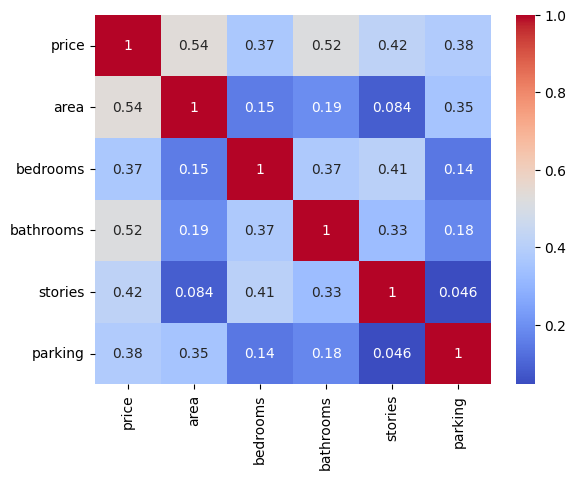

In [17]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [18]:
print(df.select_dtypes(include=['object','category']).columns)

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='str')


C:\Users\56932\AppData\Local\Temp\ipykernel_17992\1192556598.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  print(df.select_dtypes(include=['object','category']).columns)


C:\Users\56932\AppData\Local\Temp\ipykernel_17992\4290113646.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_columns = df.select_dtypes(include=['object','category']).columns


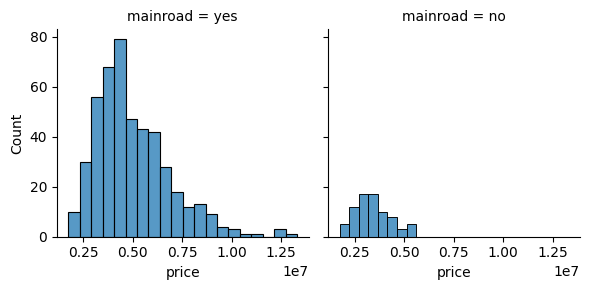

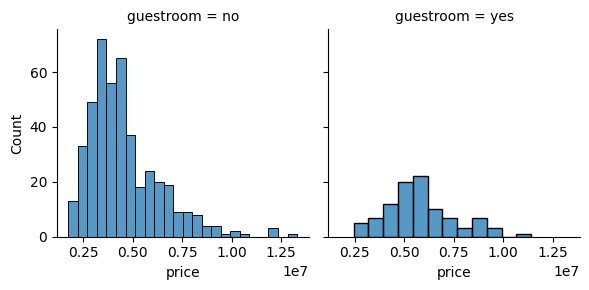

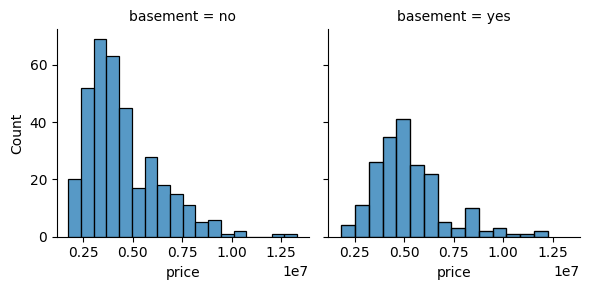

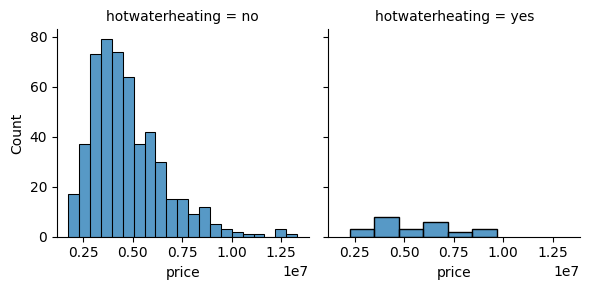

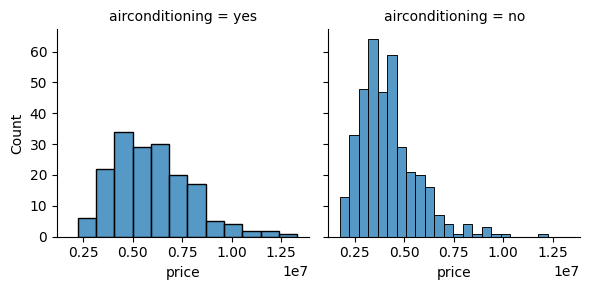

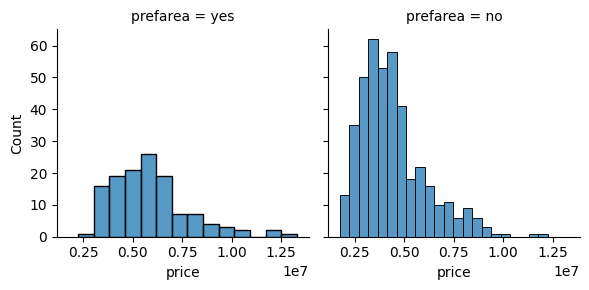

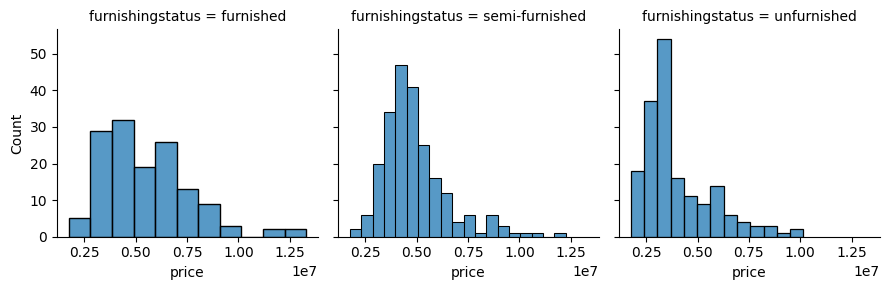

In [19]:
cat_columns = df.select_dtypes(include=['object','category']).columns

for i in cat_columns:
    g = sns.FacetGrid(df, col=i)
    g.map(sns.histplot, 'price')

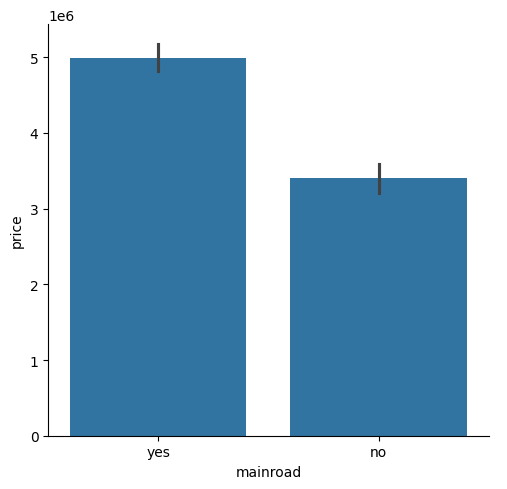

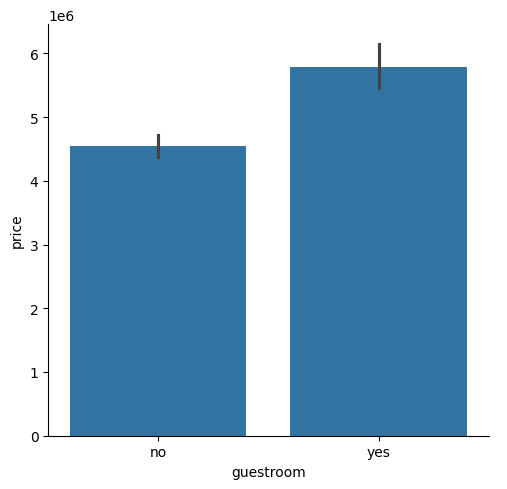

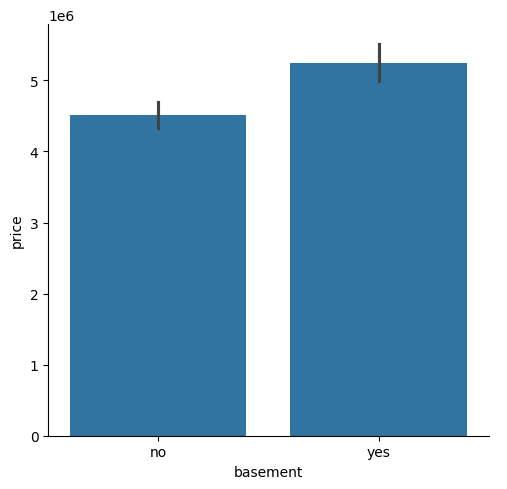

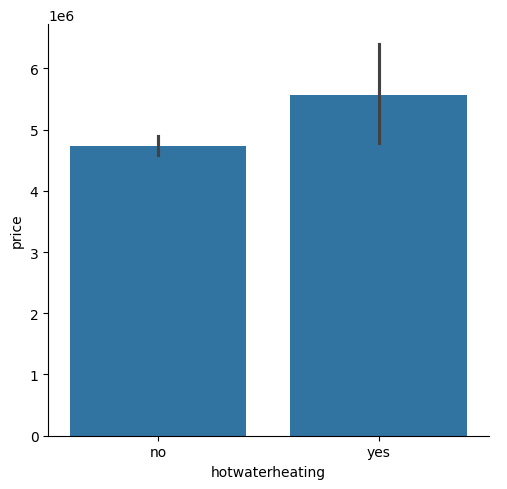

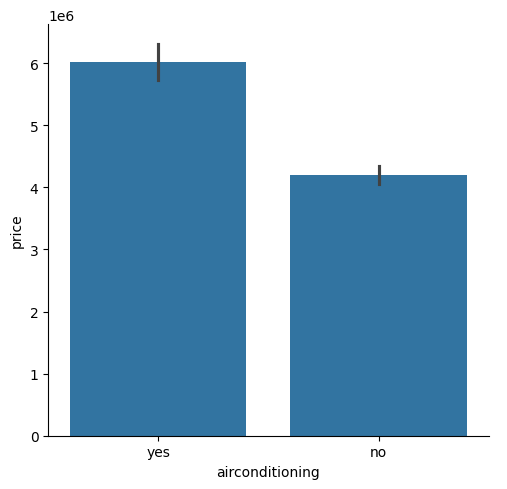

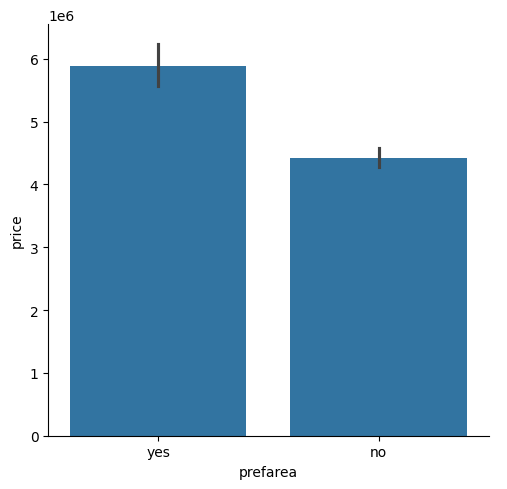

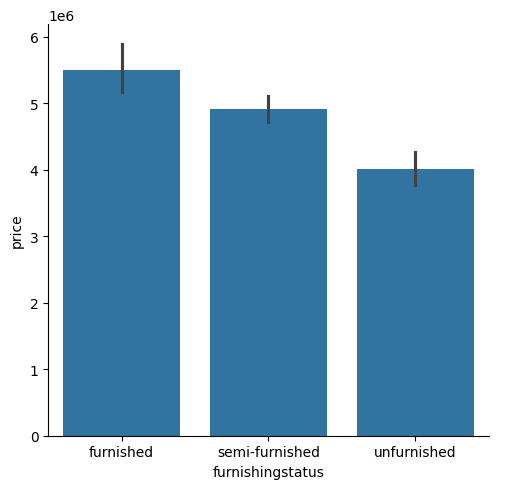

In [20]:

sns.catplot(x='mainroad', y='price', data=df, kind='bar')
sns.catplot(x='guestroom', y='price', data=df, kind='bar')
sns.catplot(x='basement', y='price', data=df, kind='bar')
sns.catplot(x='hotwaterheating', y='price', data=df, kind='bar')
sns.catplot(x='airconditioning', y='price', data=df, kind='bar')
sns.catplot(x='prefarea', y='price', data=df, kind='bar')
sns.catplot(x='furnishingstatus', y='price', data=df, kind='bar')





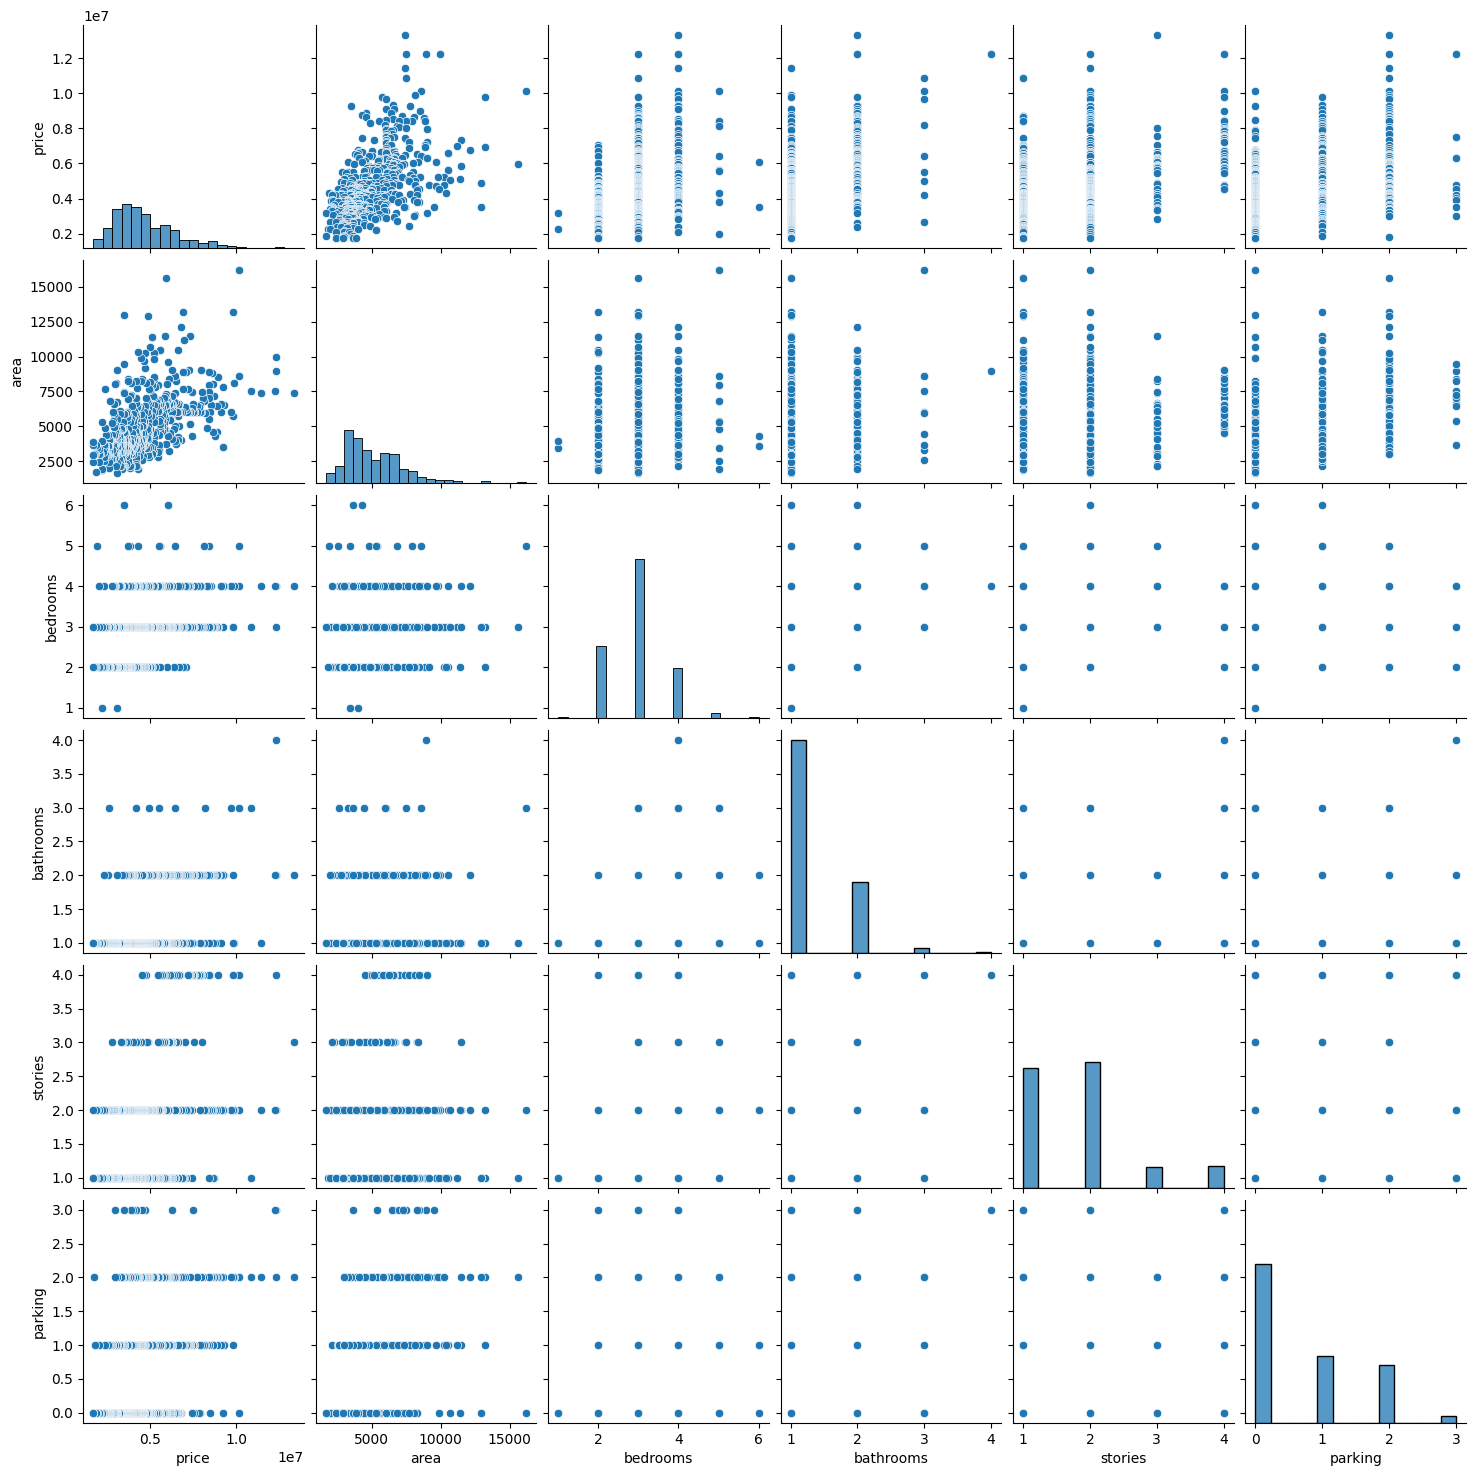

In [21]:
sns.pairplot(df)

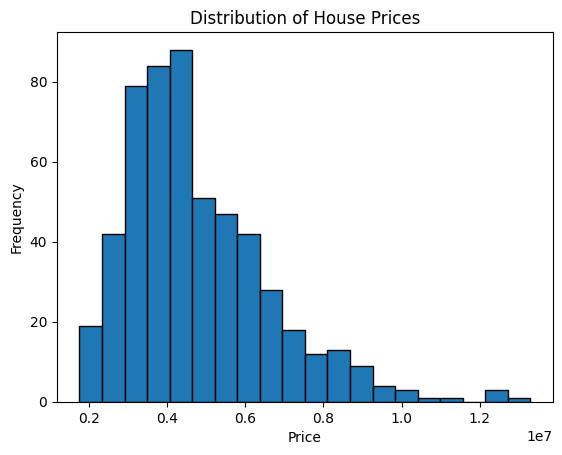

In [22]:
prices = df['price']

plt.hist(prices, bins=20, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices')
plt.show()

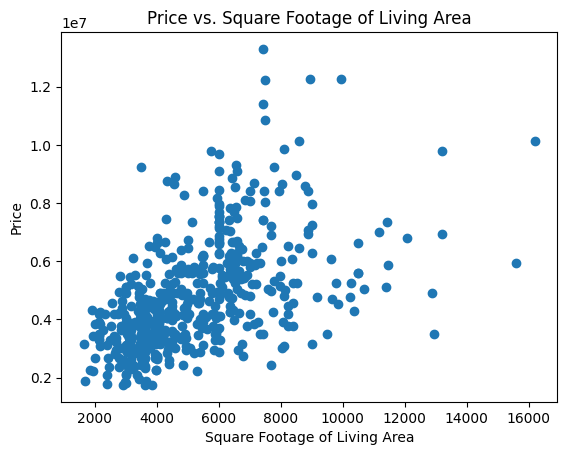

In [23]:
plt.scatter(df['area'], df['price'])
plt.xlabel('Square Footage of Living Area')
plt.ylabel('Price')
plt.title('Price vs. Square Footage of Living Area')
plt.show()

C:\Users\56932\AppData\Local\Temp\ipykernel_17992\4078245154.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, showfliers=True)


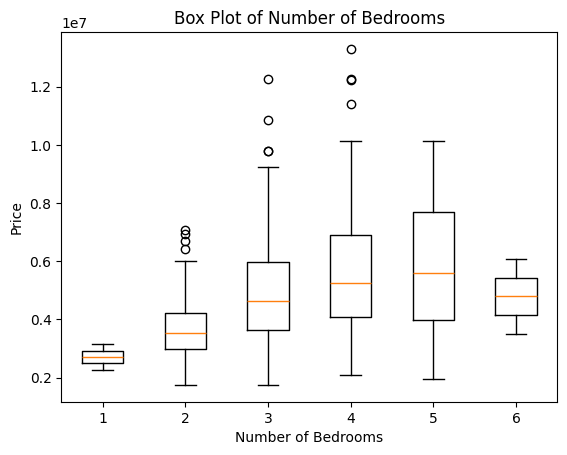

In [24]:
tmp = df[["bedrooms", "price"]].dropna()

groups = tmp.groupby("bedrooms")["price"]
labels = sorted(groups.groups.keys())
data = [groups.get_group(b).to_numpy() for b in labels]

plt.boxplot(data, labels=labels, showfliers=True)
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.title('Box Plot of Number of Bedrooms')
plt.show()

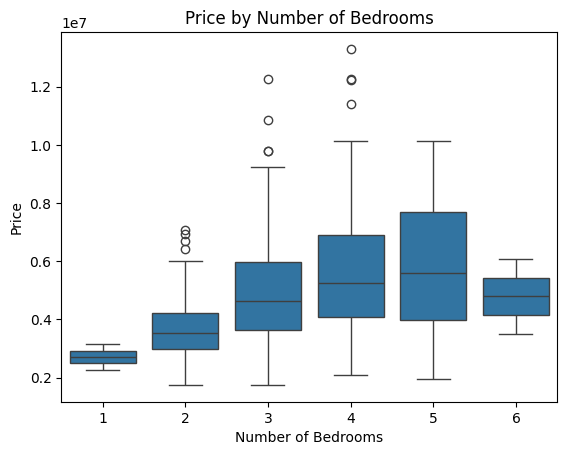

In [25]:
# easier with seaborn
sns.boxplot(data=df, x="bedrooms", y="price")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Price")
plt.title("Price by Number of Bedrooms")
plt.show()

# Outliers

Text(0.5, 0, 'Price')

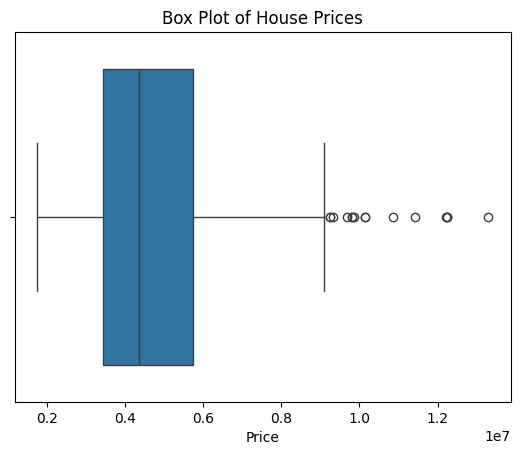

In [26]:
sns.boxplot(df, x = 'price')
plt.title('Box Plot of House Prices')
plt.xlabel('Price')

In [27]:
df['price'].quantile([0, 0.25, 0.5, 0.75, 1])

0.00     1750000.0
0.25     3430000.0
0.50     4340000.0
0.75     5740000.0
1.00    13300000.0
Name: price, dtype: float64

 Generate IQR

In [28]:
IQR = df['price'].quantile(0.75) - df['price'].quantile(0.25)
lower_bound = df['price'].quantile(0.25) - 1.5 * IQR
upper_bound = df['price'].quantile(0.75) + 1.5 * IQR
print(f"IQR: {IQR}")
print(f"Lower bound for outliers: {lower_bound}")
print(f"Upper bound for outliers: {upper_bound}")


IQR: 2310000.0
Lower bound for outliers: -35000.0
Upper bound for outliers: 9205000.0


In [29]:
df[df['price'] < lower_bound]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus


In [30]:
df[df['price'] > upper_bound]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


# Split dataset

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X = df.drop('price', axis=1)
y = df['price']

In [33]:
# train and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [34]:
print("X_train Shape:",  X_train.shape)
print("X_test Shape:", X_test.shape)
print("Y_train Shape:", y_train.shape)
print("Y_test Shape:", y_test.shape)

X_train Shape: (381, 12)
X_test Shape: (164, 12)
Y_train Shape: (381,)
Y_test Shape: (164,)


# Models